In [1]:
from fastai.vision import *

In [2]:
torch.cuda.get_device_name(0)

'GeForce GTX 1070'

In [ ]:
folder = 'helmet'
file = 'helmet.csv'

In [ ]:
folder = 'nohelmet'
file = 'nohelmet.csv'

In [3]:
path = Path('C:\\Users\\ghost\\Desktop\\binary')

In [4]:
classes = ['helmet','nohelmet']

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['helmet', 'nohelmet']

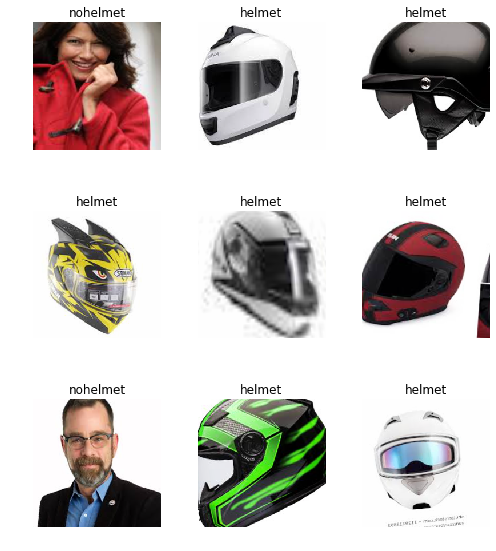

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['helmet', 'nohelmet'], 2, 851, 212)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.342132,0.029816,0.014151,00:46
1,0.166919,0.015628,0.004717,00:30
2,0.103019,0.016766,0.004717,00:33
3,0.075908,0.016765,0.004717,00:31


In [11]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1');

In [12]:
learn.unfreeze()

In [15]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


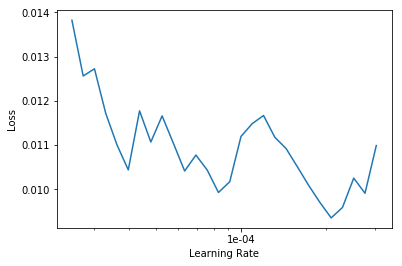

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.044443,0.008160,0.004717,00:33
1,0.049141,0.003723,0.004717,00:32


In [18]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

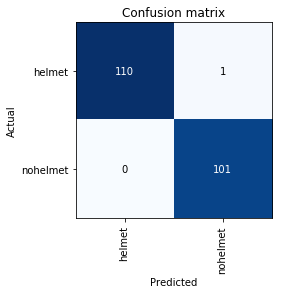

In [20]:
interp.plot_confusion_matrix()

In [21]:
learn.export()

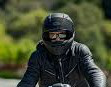

In [38]:
img = open_image(path/'test'/'img3.jpg')
img

In [23]:
learn = load_learner(path)

In [39]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category helmet